In [1]:
%matplotlib notebook

import numpy as np
import spectral
from scipy import sparse
import pytest
from equations import CGLEquation
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [2]:
N = 256
num_steps = 2000
x_basis = spectral.Chebyshev(N, interval=(0, 100))
domain = spectral.Domain([x_basis])
x = x_basis.grid()
u = spectral.Field(domain, dtype=np.complex128)

u.require_grid_space()
u.data = (1e-3 * np.sin(5 * np.pi * x / 100)
        + 1e-3 * np.sin(2 * np.pi * x / 100))

CGL = CGLEquation(domain, u)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


<IPython.core.display.Javascript object>


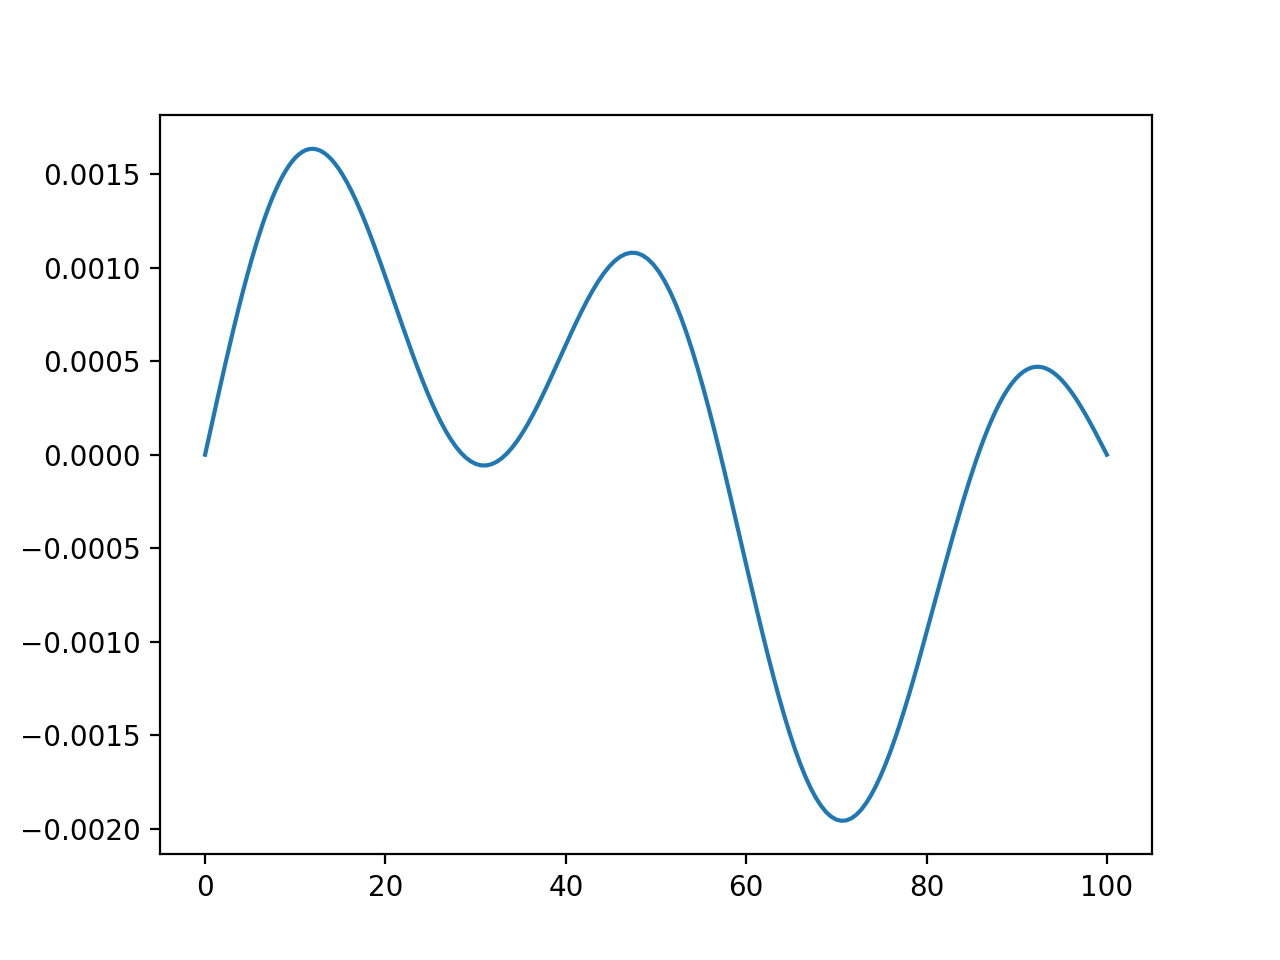

In [3]:
plt.figure()
plt.plot(x,u.data)

In [4]:
unorm = LA.norm(u.data)
unorm

0.014482170177033356

<IPython.core.display.Javascript object>


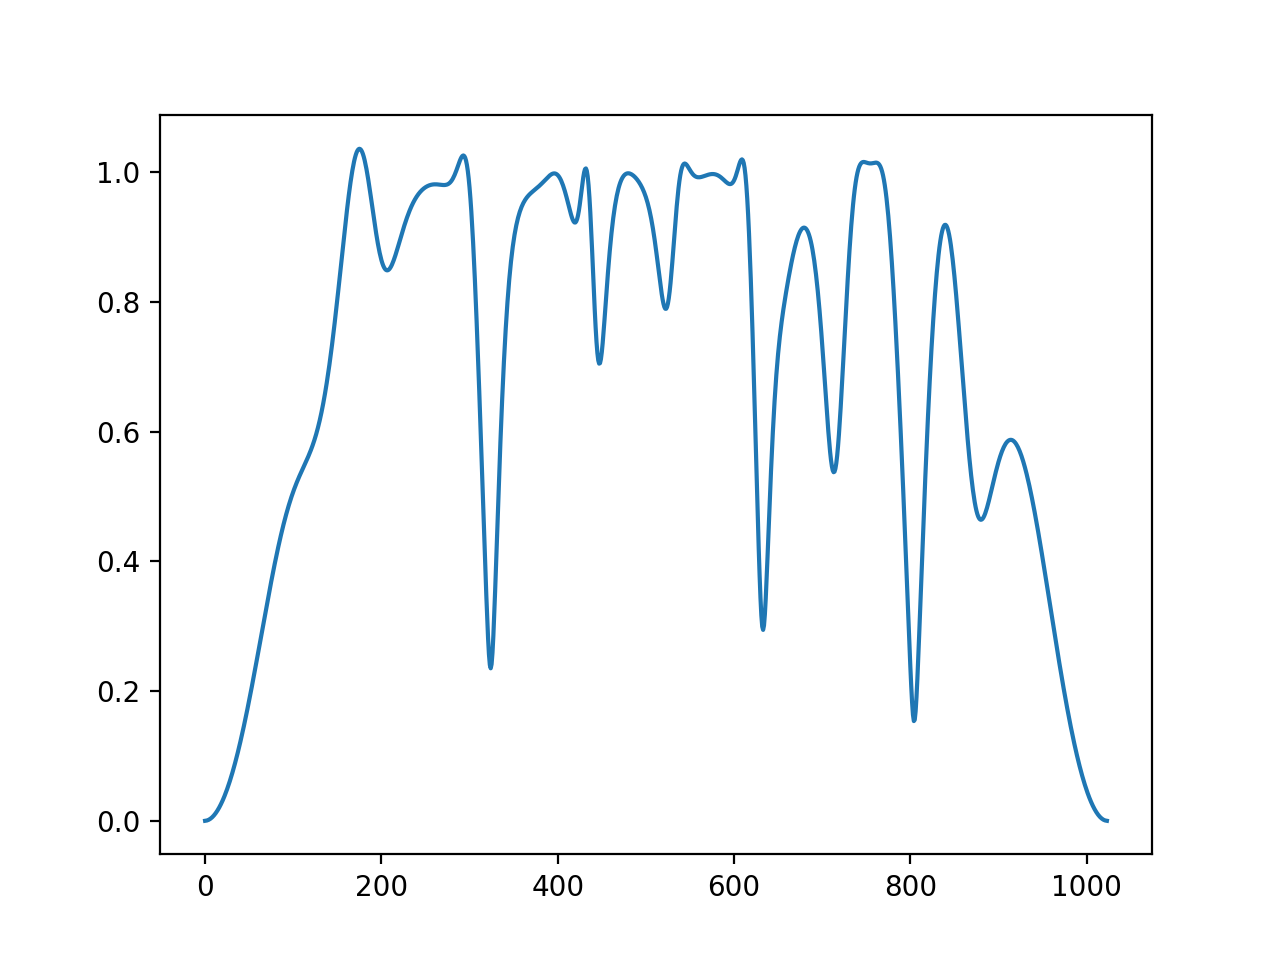

In [5]:
sol = np.loadtxt('CGL.dat')
plt.figure()
plt.plot(sol)

<IPython.core.display.Javascript object>


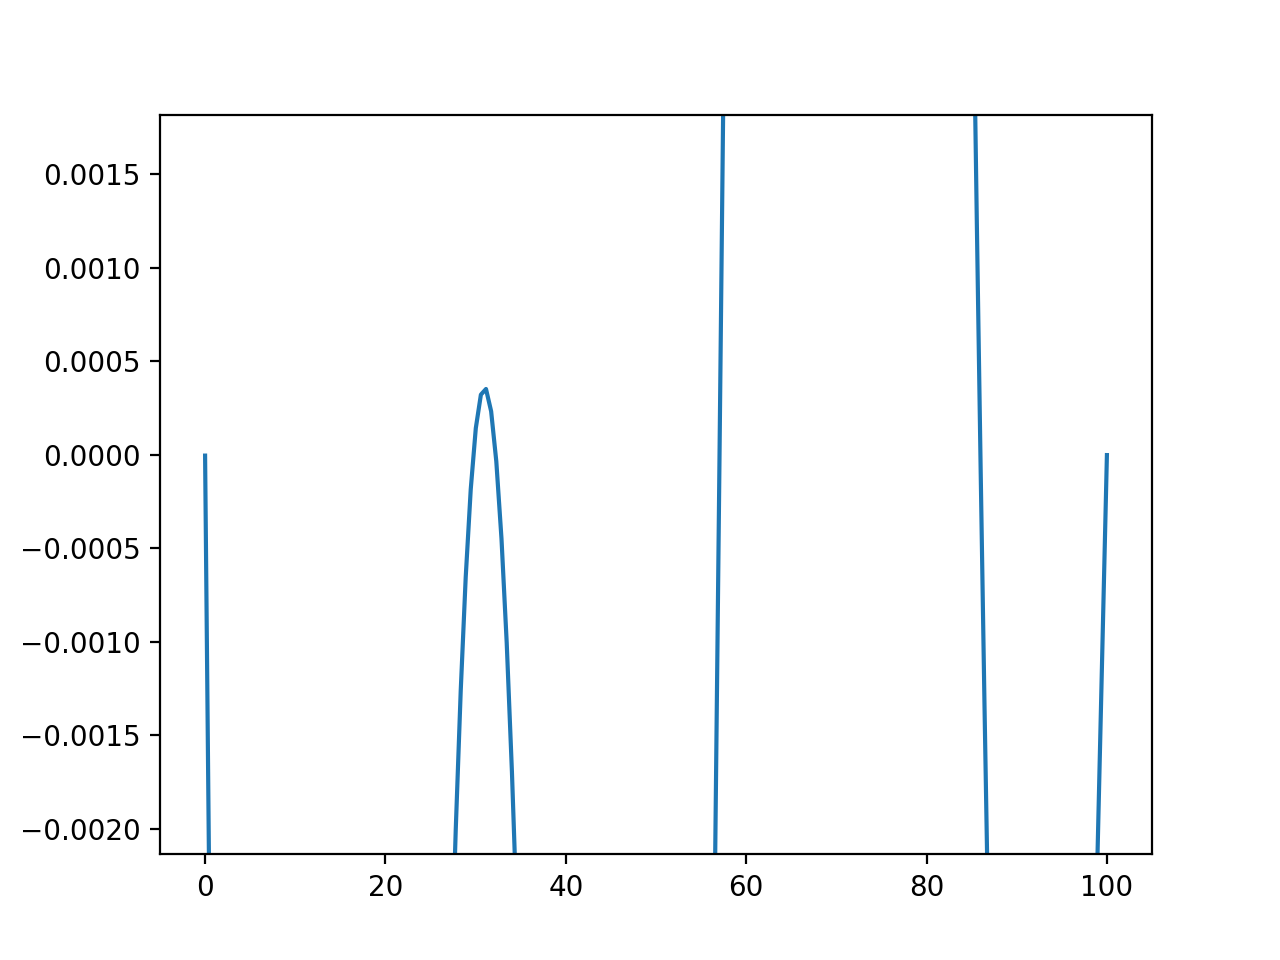

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [6]:
fig = plt.figure()
p, = plt.plot(x, u.data)
for i in range(num_steps//10):
    CGL.evolve(spectral.SBDF2, 0.05, 10)
#     u.require_coeff_space()
#     u.require_grid_space(scales=1024/N)
    u.require_grid_space()
    p.set_ydata(u.data.real)
    fig.canvas.draw()